In [1]:
#!/usr/bin/python

# Solution to problem 21.5 Chapra & Canale, Numerical Methods for Engineers 6th Ed., McGraw Hill, New York, NY (2010)
# Author: Frank Jenkins

# Portion of code adapted from: J. Kiusalass, Numerical Methods in Engineering with Python 3, Cambridge University Press, New York, NY (2013).
# Portions of code adapted from: S. Linge & H.P. Langtangen, Programming for Computations - Python, Texts in Computational Science and 
# Engineering, DOI 10.1007/978-3-319-32428-9_3.
# Portions of code adapted from: B. Heinold, An intuitive guide to numerical methods, Dept. of Mathematics and computer science,
# Mount St. Mary's Univ. (2013)

from sympy import *


# x = Symbol('x')
# a = Symbol('a')
# b = Symbol('b')

def f(x):
	f = lambda x: (4*x - 3)**3
	return f 

def integral(a, b):
	return (1/16)*((4*b-3)**4-(4*a-3)**4)

I_new2 = []
err2 = []

def dx(w, x):
	if(w==1):
		return 12*(4*x-3)
	if(w==2):
		return 96*(4*x-3)
	if(w==3):
		return 384
	if(w==4):
		return 0

g2 = []
err2 = []
abserr2 = []
err=[]
approx = []

def trap(f, a, b, n):
	h = (b-a)/n
	area = (f(a) + f(b))/2.0
	for i in range(1, n):
		x = a + i*h;
		area = area + f(x)
	area = area*h

	return area



print("Using the Composite Trapezoidal Rule")
print("")

for i in range(1, 50, 5):
	y = trap(f("x"), -3, 5, i)
	e = abs((integral(-3, 5) - y)/integral(-3, 5))*100    
	y = round(y, 4)
	e = round(e, 4)
	print("Approximation = ", y, "Error = ", e, "%")


print("")
print("Using the Composite 1/3 Simpsons Rule")

print("")



def sim(f, a, b, n):
    approx = []
    if a > b:
        print("Incorrect bounds")
    if n%2:
        print("Error: n must be even")
    else:
        h = (b-a)/n
        s = f(a) + f(b)
        for i in range(1, n, 2):
            s += 4*f(a + i*h)
            k = (s*h)/3
        for j in range(2, n-1, 2):
            s += 2*f(a + i*h)
            k = (s*h)/3
        approx = (s*h)/3
    return approx

r = sim(f("x"), -3, 5, 2)

err3 = abs((integral(-3, 5)-r)/r)*100
print("For n = ", 2, "the approximation is: ", sim(f("x"), -3, 5, 2), "the error is: ", err3, "%")


print("")



print("This verifies that Simpson's 1/3 method is exact for polynomials of degree 3 or less")
print("As shown in the dx function above, the analytical solution of the 4th derivative of f(x) = zero")
print("This will always be true with polynomials of degree 3 or less")
print("We cannot use lower order derivatives in the error calculation because they will have non-zero values") 


Using the Composite Trapezoidal Rule

Approximation =  6152.0 Error =  199.2218 %
Approximation =  2169.7778 Error =  5.5339 %
Approximation =  2089.8512 Error =  1.6465 %
Approximation =  2072.0 Error =  0.7782 %
Approximation =  2065.288 Error =  0.4518 %
Approximation =  2062.0592 Error =  0.2947 %
Approximation =  2060.2622 Error =  0.2073 %
Approximation =  2059.1605 Error =  0.1537 %
Approximation =  2058.4366 Error =  0.1185 %
Approximation =  2057.9357 Error =  0.0942 %

Using the Composite 1/3 Simpsons Rule

For n =  2 the approximation is:  2056.0 the error is:  0.0 %

This verifies that Simpson's 1/3 method is exact for polynomials of degree 3 or less
As shown in the dx function above, the analytical solution of the 4th derivative of f(x) = zero
This will always be true with polynomials of degree 3 or less
We cannot use lower order derivatives in the error calculation because they will have non-zero values


In [2]:
def sim38(f, a, b, n):
	h = (b-a)/n
	s5 = f(a) + f(b)
	for i in range(n):
		if(n%3 == 0):
			s5 = s5 + 2*f(a + i*h)
		else:
			s5 = s5 + 3*f(a + i*h)			
	s = ((3*h)/8)*s5 
	return s	



In [3]:
print("Using the Composite 3/8 Simpsons Rule")
print("")

for i in range(1, 100, 3):
	s38 = sim38(f("x"), -3, 5, i)
	e38 = abs((integral(-3, 5) - s38)/integral(-3, 5))*100    
	s38 = round(s38, 4)
	e38 = round(e38, 4)
	print("Approximation = ", s38, "Error = ", e38, "%")
    
print("")

print("We see the error consistently decreasing, so let's try n = 200")
print("")
print("Approximation at n = 200: ", sim38(f("x"), -3, 5, 200))
print("The error at n = 200: ", abs((integral(-3, 5) - sim38(f("x"), -3, 5, 200))/integral(-3, 5))*100, "%")

print("")
print("Something interesting occurs when we increase n to 200")
print("We see the error begin to increase, implying there is an ideal value for n")
print("To improve our result, we can set conditions and a tolerance value")

print("")

for i in range(1, 200, 3):
    ss38 = sim38(f("x"), -3, 5, i)
    err6 = abs((integral(-3, 5) - ss38)/integral(-3, 5))*100
    if(err6 <= 0.005):
        print("Approximation = ", ss38, "Error = ", err6, "%")
    
print("")
print("As shown, constraining our algorithm within a tolerance level improved our result significantly")

Using the Composite 3/8 Simpsons Rule

Approximation =  -25761.0 Error =  1352.9669 %
Approximation =  -5569.5 Error =  370.8901 %
Approximation =  -2261.8163 Error =  210.0105 %
Approximation =  -909.12 Error =  144.2179 %
Approximation =  -173.7337 Error =  108.4501 %
Approximation =  288.375 Error =  85.974 %
Approximation =  605.6593 Error =  70.5419 %
Approximation =  836.9752 Error =  59.2911 %
Approximation =  1013.0928 Error =  50.7251 %
Approximation =  1151.6633 Error =  43.9852 %
Approximation =  1263.5369 Error =  38.5439 %
Approximation =  1355.7509 Error =  34.0588 %
Approximation =  1433.0687 Error =  30.2982 %
Approximation =  1498.83 Error =  27.0997 %
Approximation =  1555.4456 Error =  24.346 %
Approximation =  1604.6994 Error =  21.9504 %
Approximation =  1647.9396 Error =  19.8473 %
Approximation =  1686.2041 Error =  17.9862 %
Approximation =  1720.3051 Error =  16.3276 %
Approximation =  1750.887 Error =  14.8401 %
Approximation =  1778.4679 Error =  13.4986 %
Ap

In [4]:
# portions of code adapted from Institute of Physics, University of Graz, Graz Austria, available at: 
# http://physik.uni-graz.at/~pep/CompOriPhys/Python/romberg.py, accessed Nov. 6, 2018

import numpy as np

def romberg(f, a, b, n):
    z = np.zeros((n,n), float)
    for i in range(0,n):
        N=2**i
        z[i,0]=trap(f, a, b, N)
        for k in range(0,i):
            n = k+2
            z[i,k+1]=1.0/(4**(n-1)-1)*(4**(n-1)*z[i,k] - z[i-1,k])
    print("The approximation at n = ", n, "is: ", z[i,k+1], "-- with ", N, "panels")
            

In [5]:
romberg(f("x"), -3, 5, 5)
romberg(f("x"), -3, 5, 10)



The approximation at n =  5 is:  2056.0 -- with  16 panels
The approximation at n =  10 is:  2056.0 -- with  512 panels


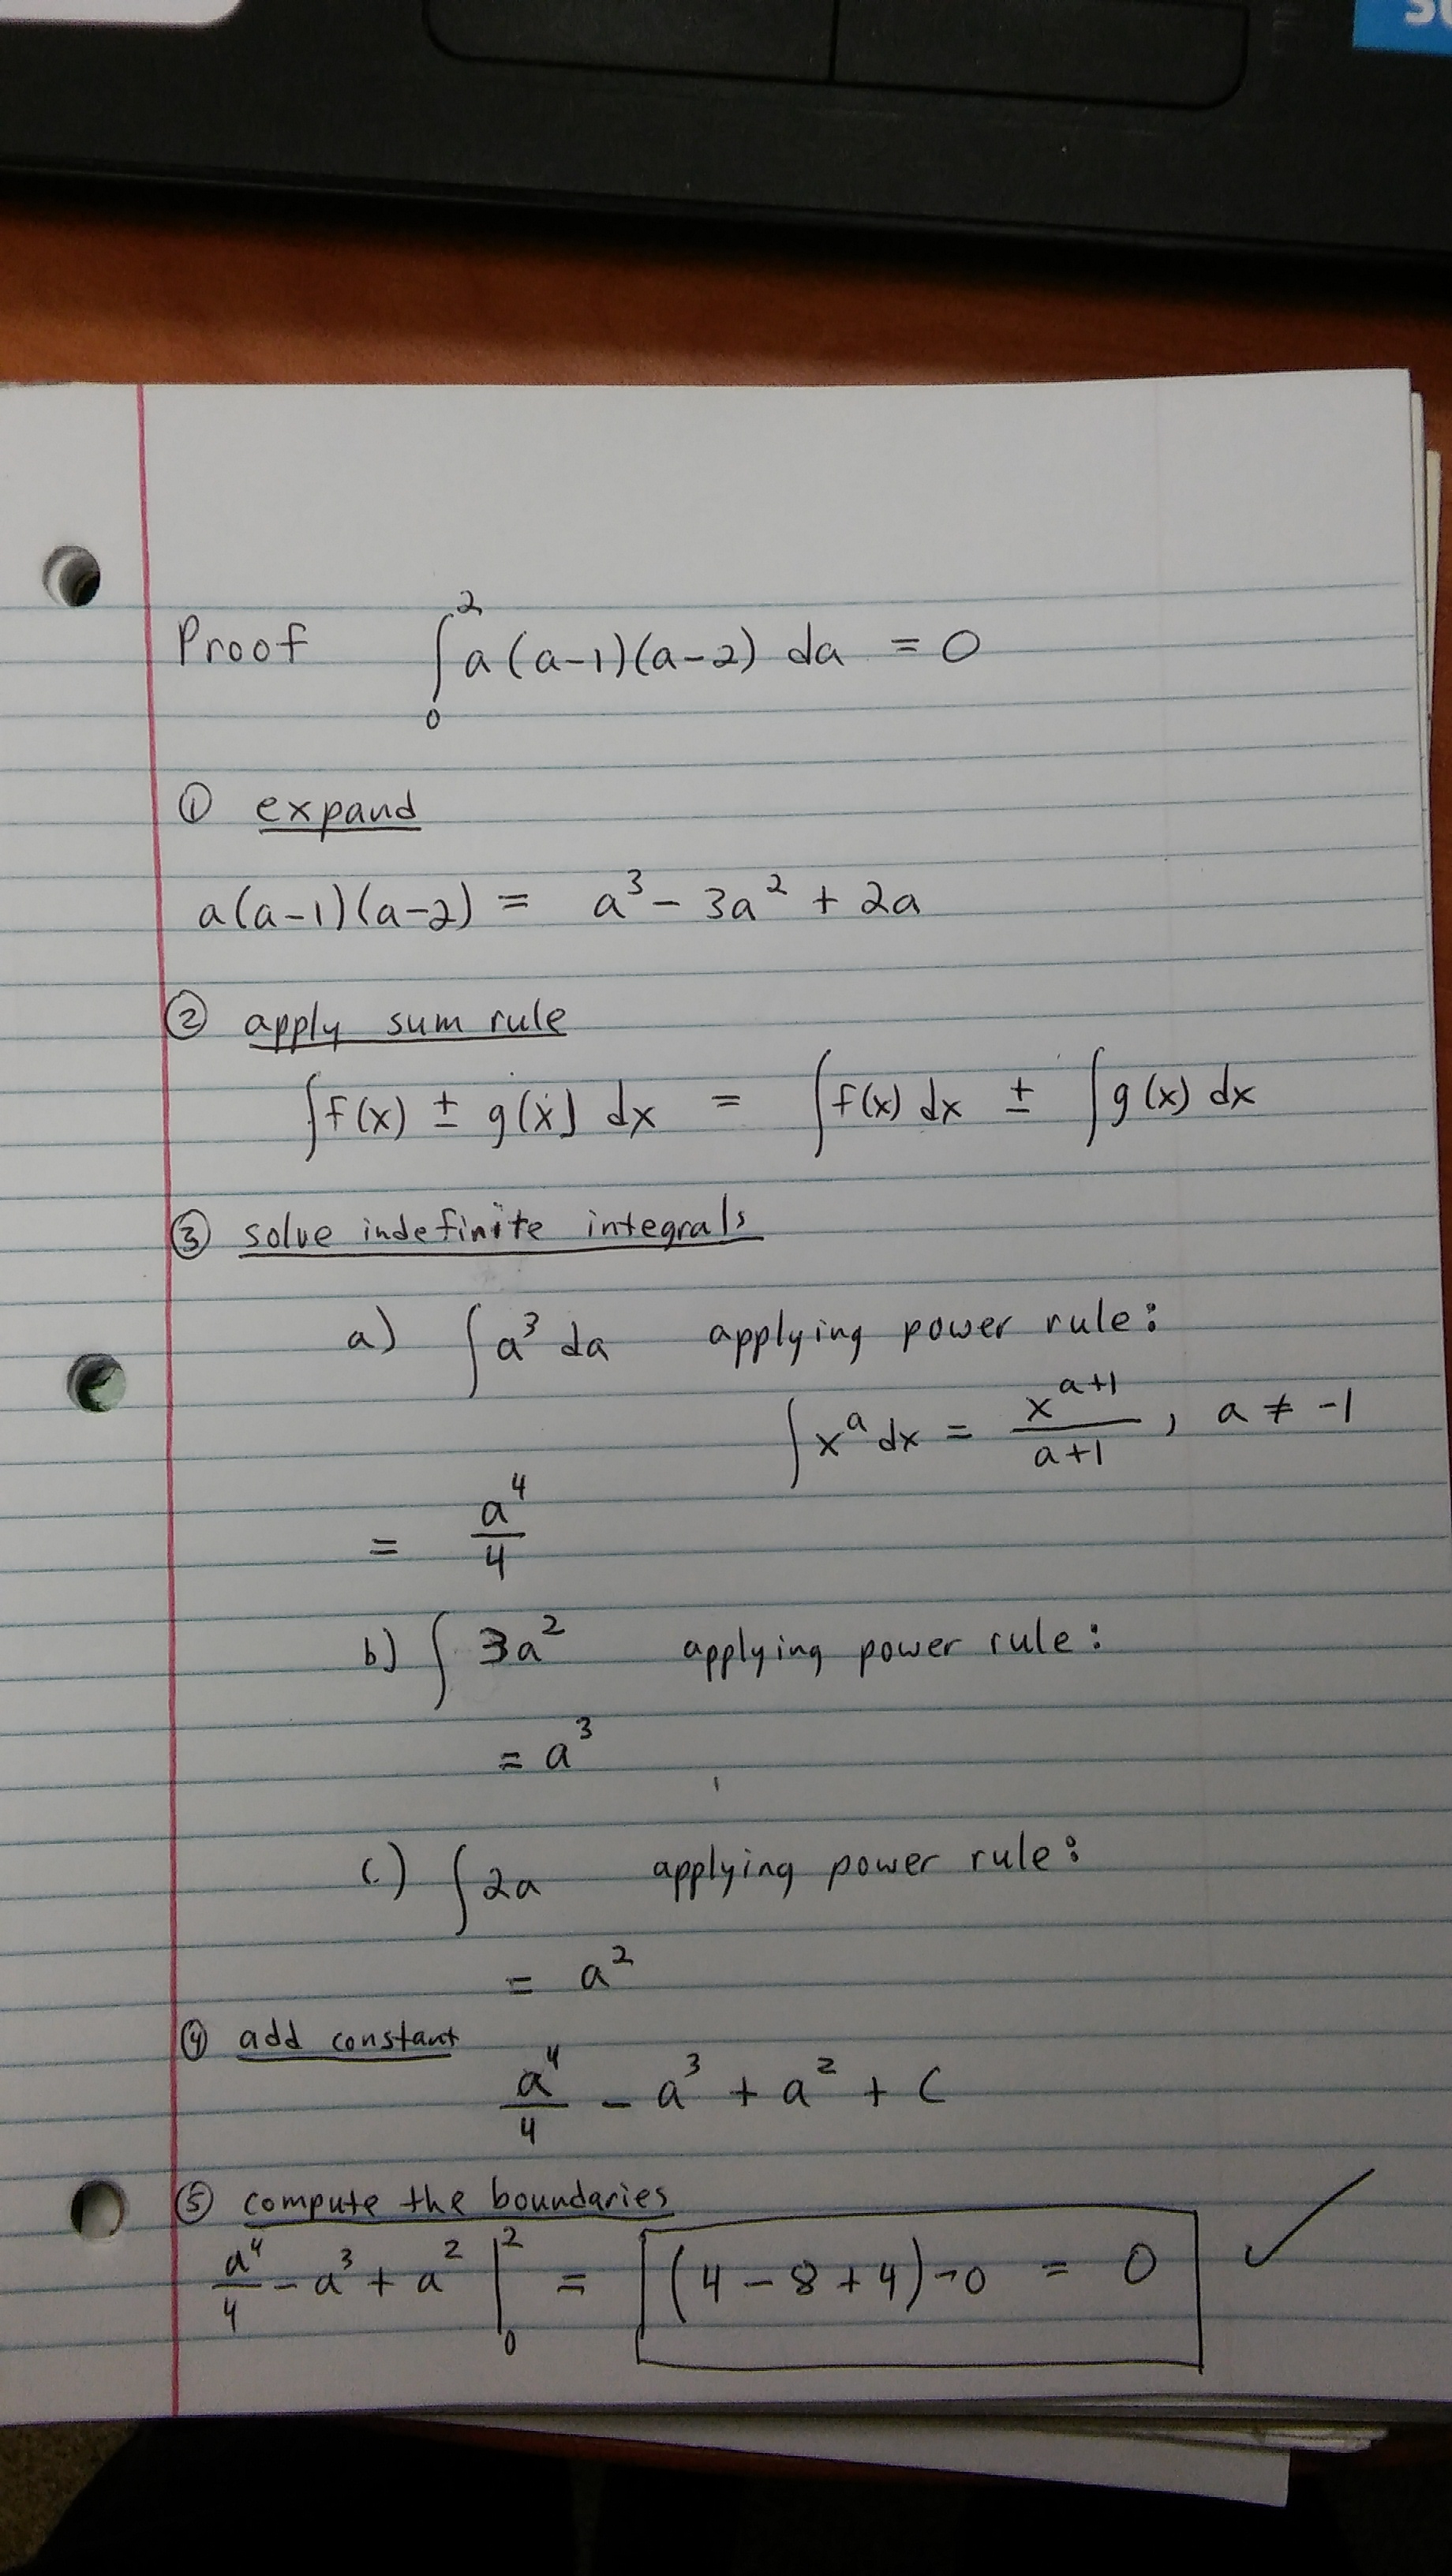